In [1]:
import numpy as np
import pandas as pd
import imageio
import h5py
import pickle

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
dataset_dir = Path('data')
csv_files = sorted(list(dataset_dir.glob('crop_*.csv')))

In [3]:
using_columns = ['timestamp',
                 'acceleration_x', 'acceleration_y', 'acceleration_z',
                 'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
                 'input_orientation_x', 'input_orientation_y', 'input_orientation_z', 'input_orientation_w',
                 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [4]:
def interpolation(x, xt, y, yt, t):
    if xt == t:
        return x
    if yt == t:
        return y
    return x + (t - xt) / (yt - xt) * (y - x)

In [5]:
def clean_csv(csv) -> pd.DataFrame:
    rows = {col: [float(csv[col][0])] for col in using_columns}

    dt = 11760000
    nt = rows['timestamp'][0] + dt
    ni = 1

    while True:
        if ni >= len(csv) - 2:
            break

        for i in range(ni, len(csv)):
            if csv['timestamp'][i] > nt:
                for col in using_columns:
                    rows[col].append(interpolation(csv[col][i-1], csv['timestamp'][i-1], csv[col][i], csv['timestamp'][i], nt))
                break

        nt += dt
        ni = i - 1
    
    return pd.DataFrame(rows)

In [9]:
def __f(csv_no):
    csv_file = dataset_dir / f'crop_{csv_no:02d}.csv'
    out_file = dataset_dir / f'interpolation_{csv_no:02d}.csv'

    csv = pd.read_csv(csv_file)
    csv = clean_csv(csv)

    csv.to_csv(out_file, index=False)
    return csv

In [10]:
items = list(range(22))

In [11]:
csv_list = xqdm(__f, items, num_workers=len(items), ncols=100)

100%|███████████████████████████████████████████████████████████████| 22/22 [00:34<00:00,  1.58s/it]


interpolation_00.csv


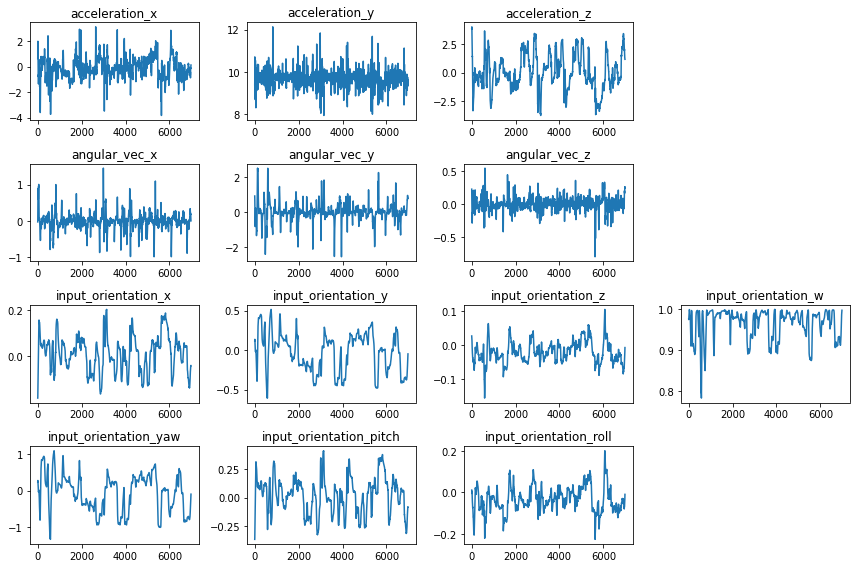

interpolation_01.csv


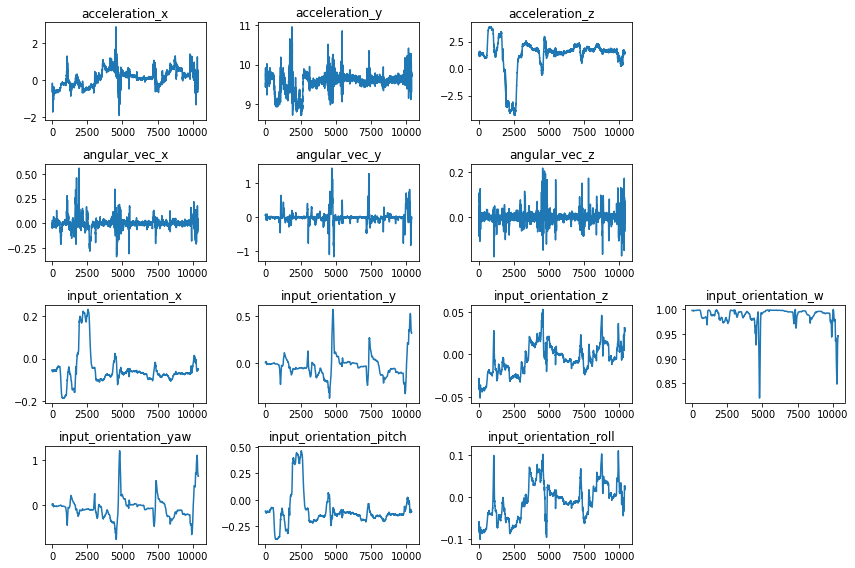

interpolation_02.csv


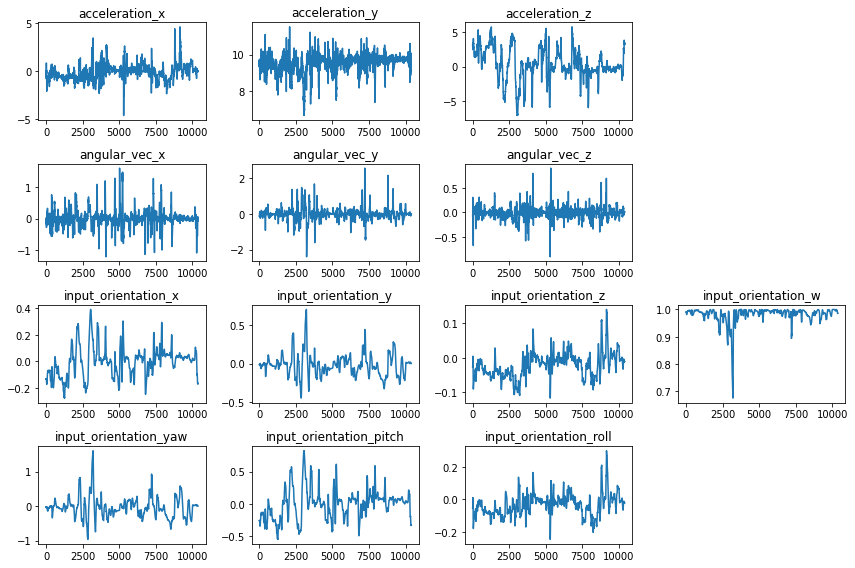

interpolation_03.csv


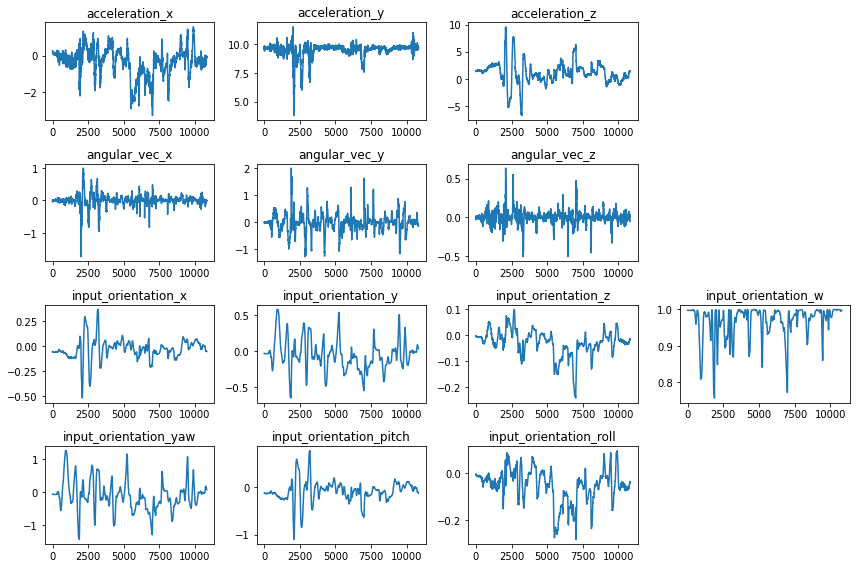

interpolation_04.csv


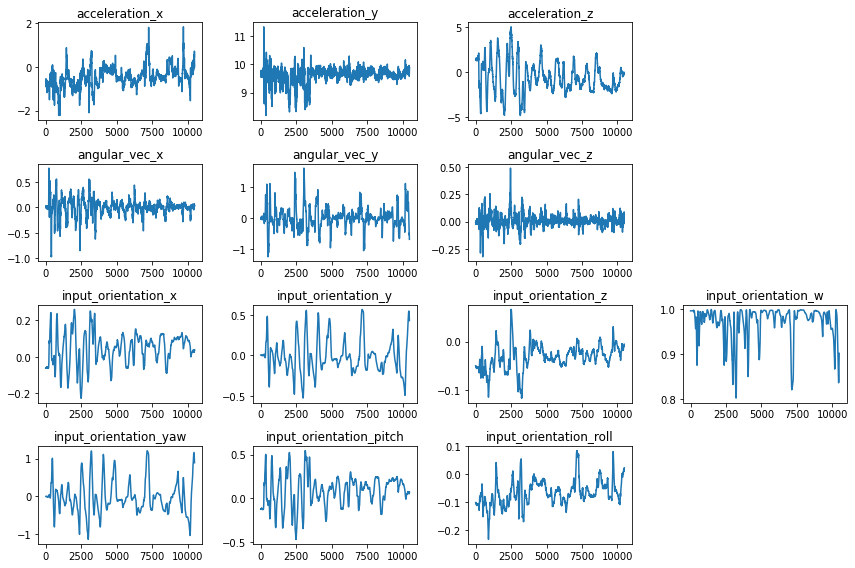

interpolation_05.csv


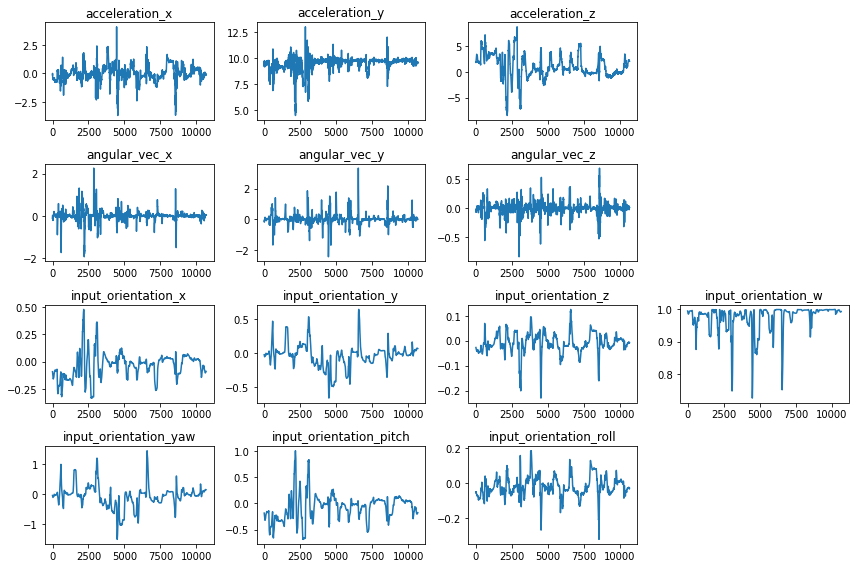

interpolation_06.csv


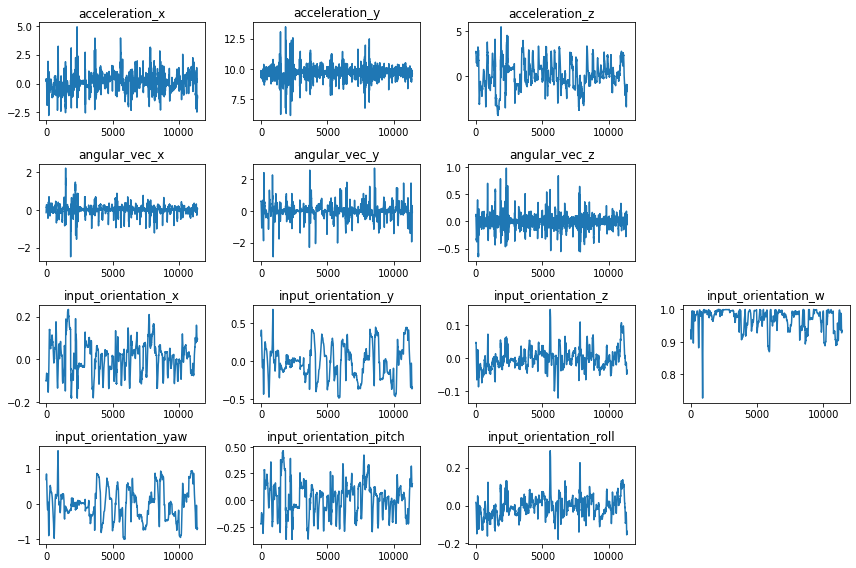

interpolation_07.csv


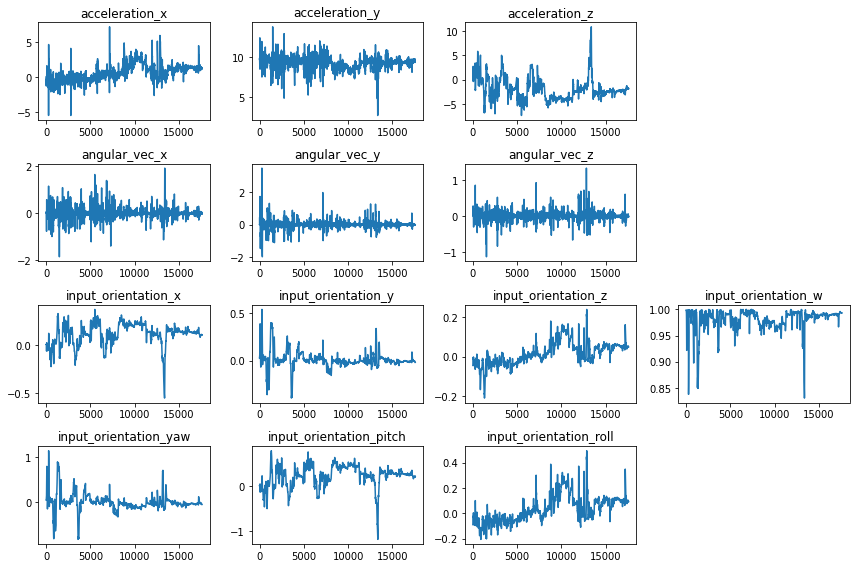

interpolation_08.csv


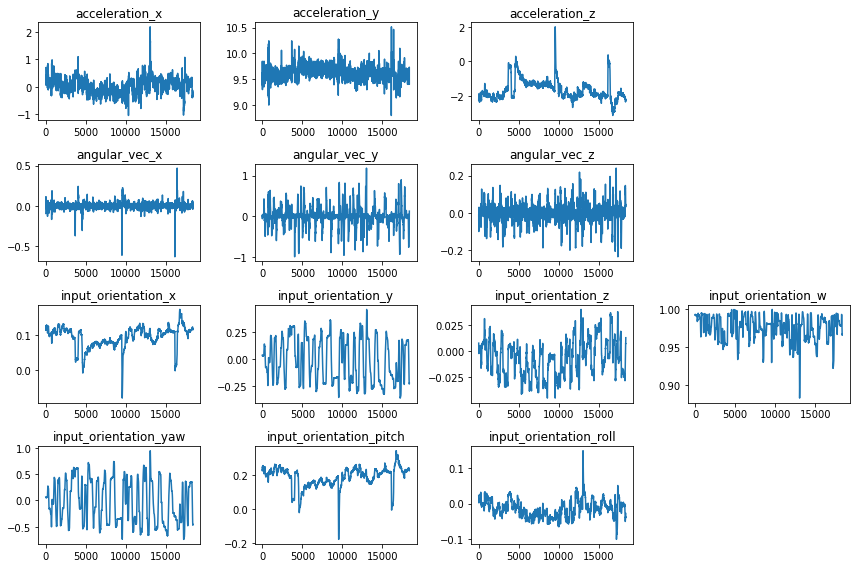

interpolation_09.csv


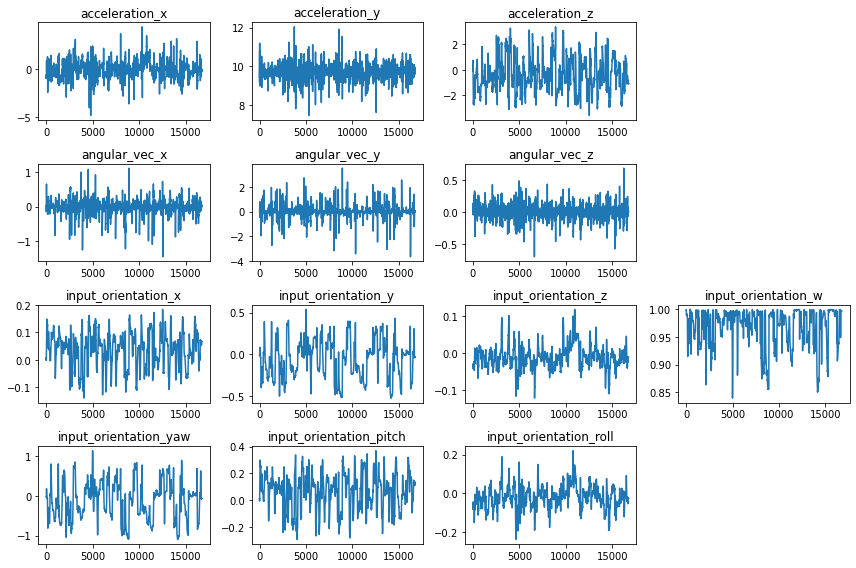

interpolation_10.csv


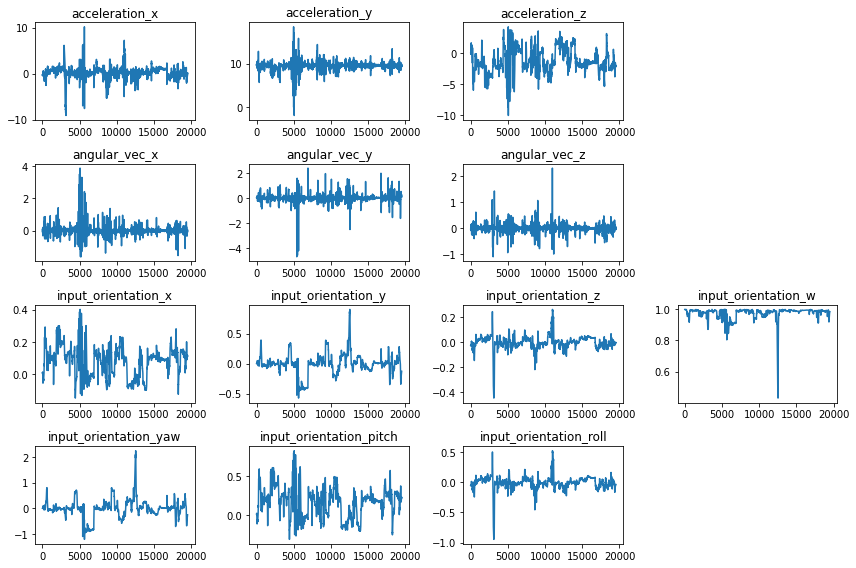

interpolation_11.csv


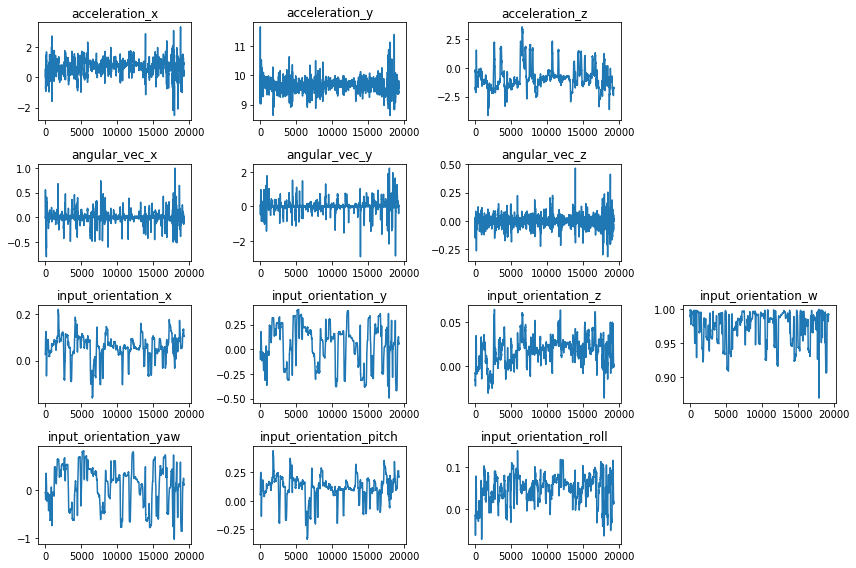

interpolation_12.csv


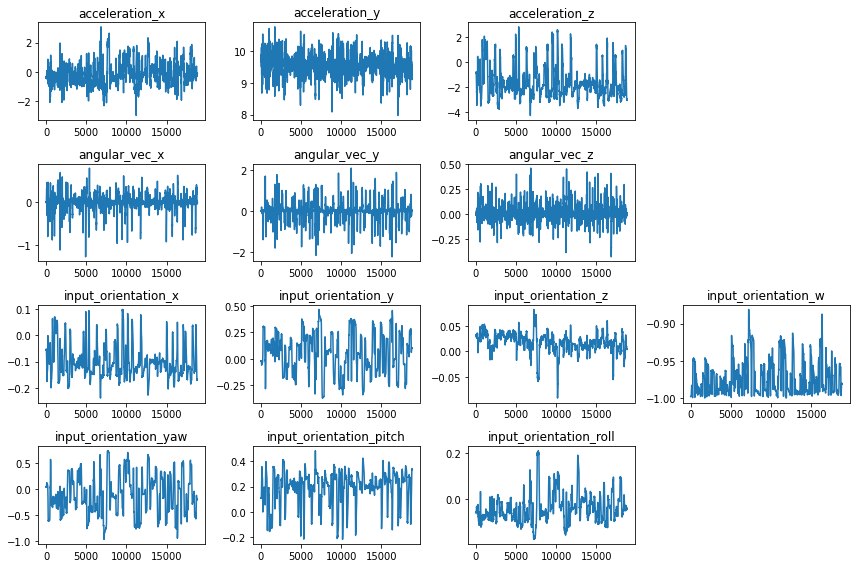

interpolation_13.csv


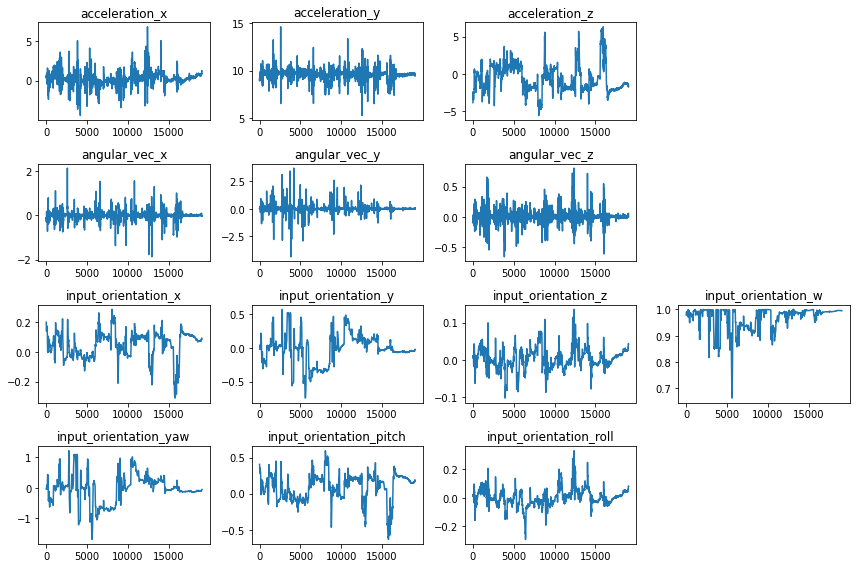

interpolation_14.csv


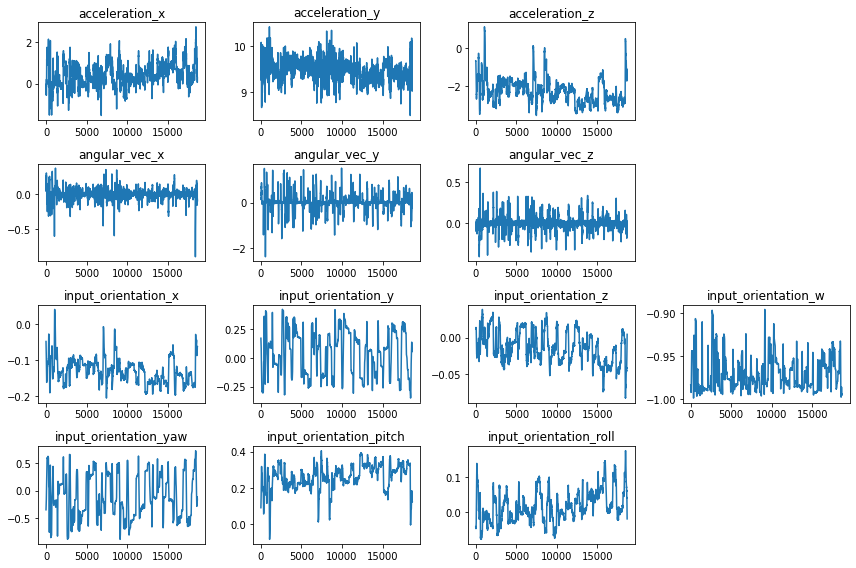

interpolation_15.csv


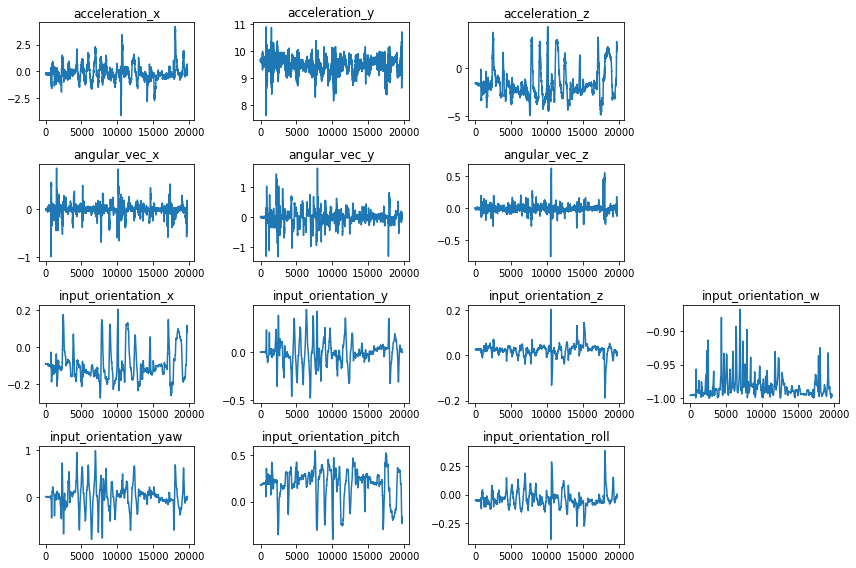

interpolation_16.csv


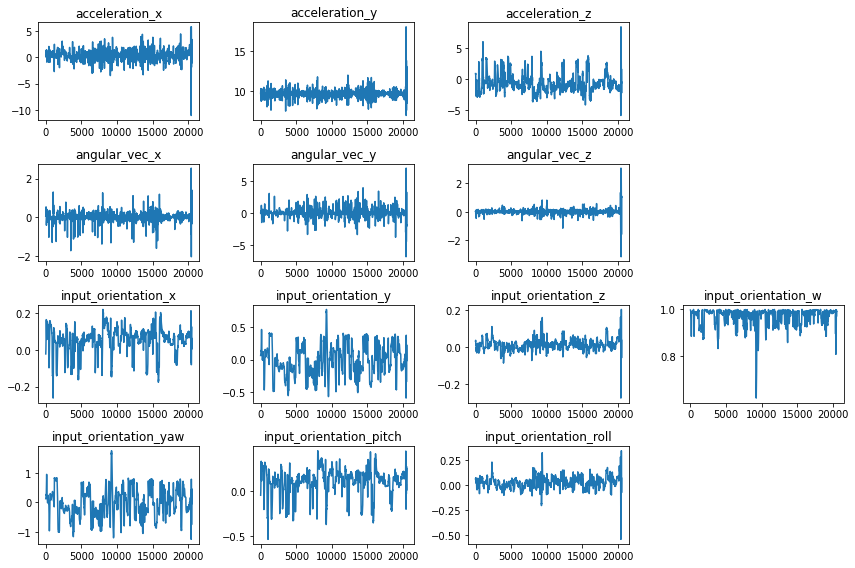

interpolation_17.csv


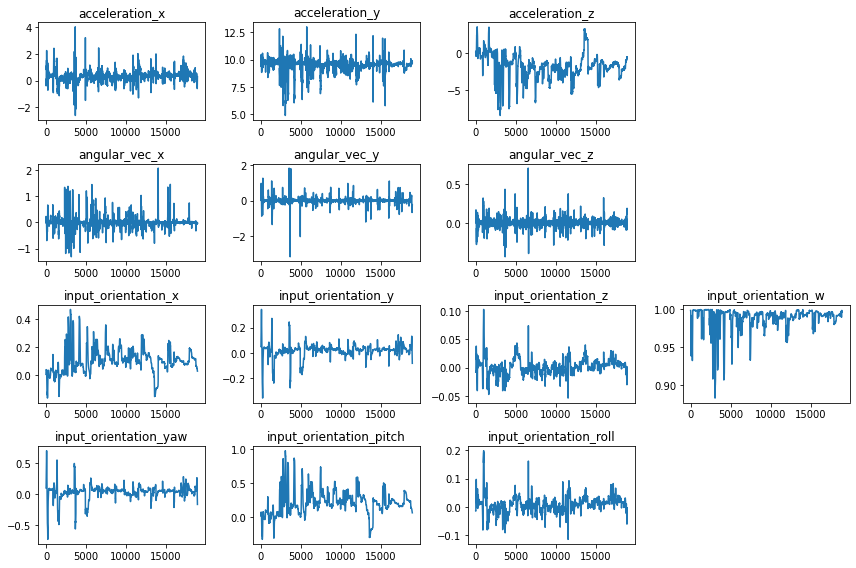

interpolation_18.csv


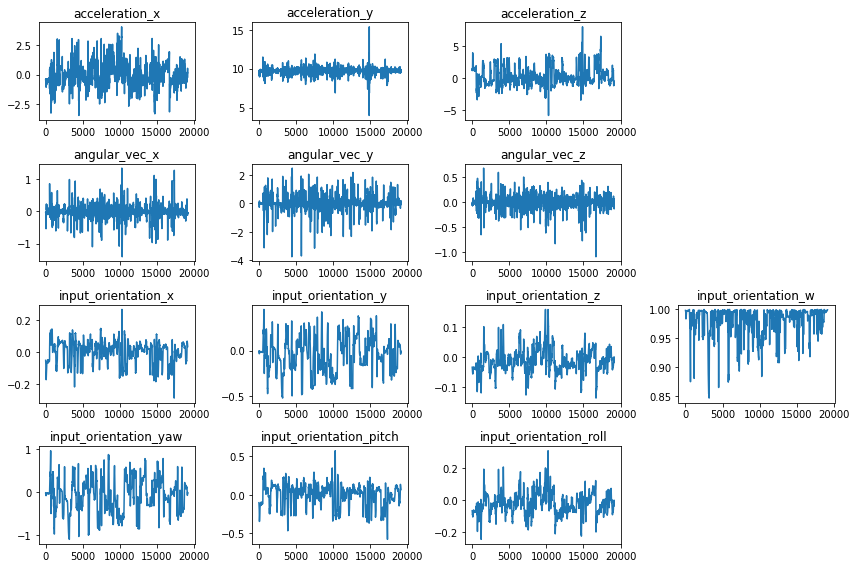

interpolation_19.csv


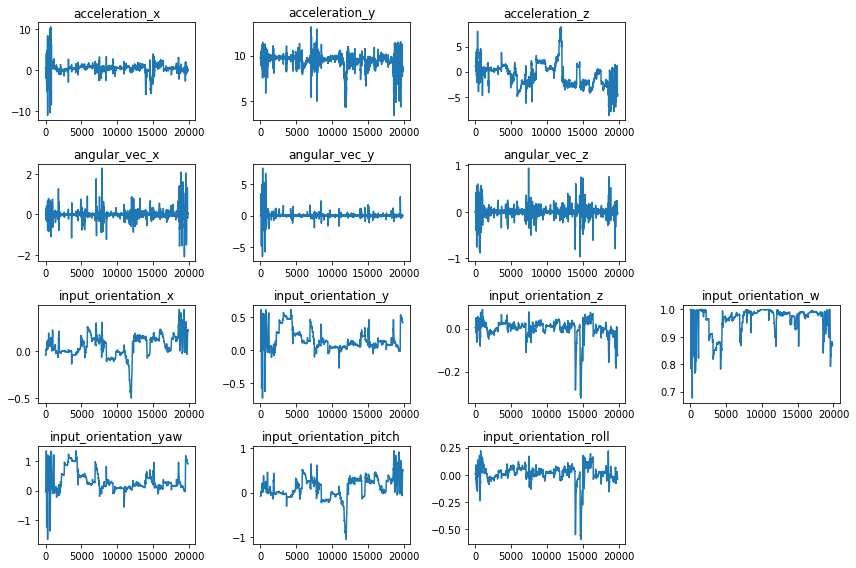

interpolation_20.csv


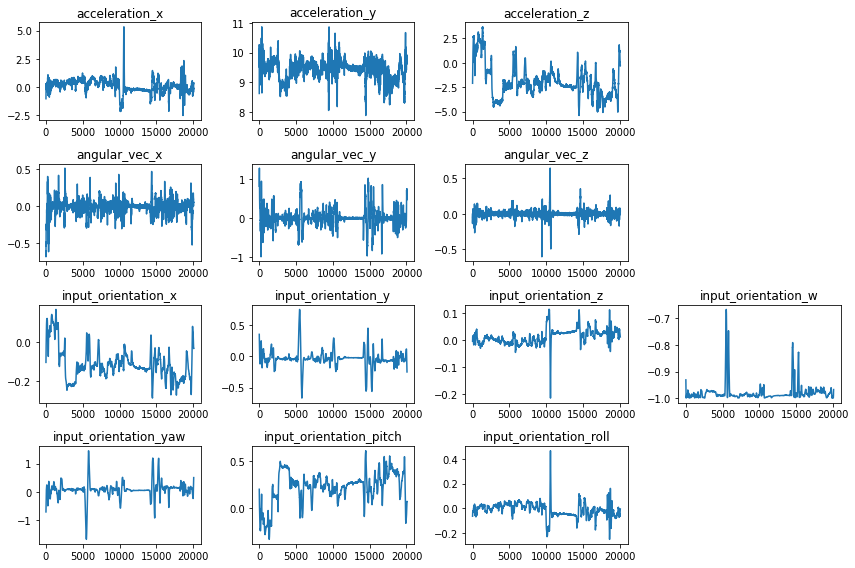

interpolation_21.csv


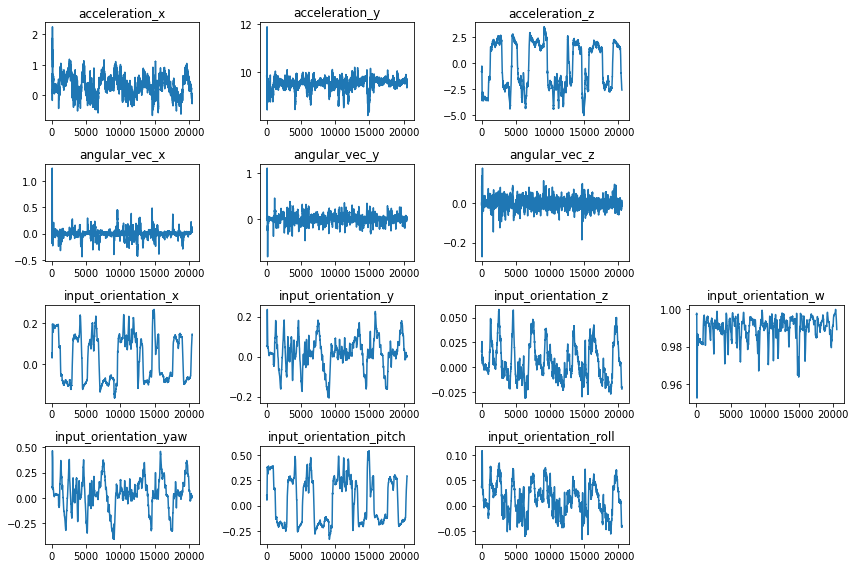

In [12]:
for k, csv in enumerate(csv_list):
    print(f'interpolation_{k:02d}.csv')
    plt.figure(figsize=(12, 8))

    for i in range(3):
        plt.subplot(4, 4, i+1)
        plt.plot(csv[using_columns[i+1]])
        plt.title(using_columns[i+1])
    for i in range(3):
        plt.subplot(4, 4, i+5)
        plt.plot(csv[using_columns[i+4]])
        plt.title(using_columns[i+4])
    for i in range(4):
        plt.subplot(4, 4, i+9)
        plt.plot(csv[using_columns[i+7]])
        plt.title(using_columns[i+7])
    for i in range(3):
        plt.subplot(4, 4, i+13)
        plt.plot(csv[using_columns[i+11]])
        plt.title(using_columns[i+11])

    plt.tight_layout()
    plt.show()

NameError: name 'csv' is not defined